In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

movies = pd.read_csv("/content/drive/MyDrive/TECH A INTERN DATA ANALYSIS/archive/ml-latest-small/movies.csv")
ratings = pd.read_csv("/content/drive/MyDrive/TECH A INTERN DATA ANALYSIS/archive/ml-latest-small/ratings.csv")
tags = pd.read_csv("/content/drive/MyDrive/TECH A INTERN DATA ANALYSIS/archive/ml-latest-small/tags.csv")

In [37]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [38]:
movies.shape

(9742, 3)

In [51]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


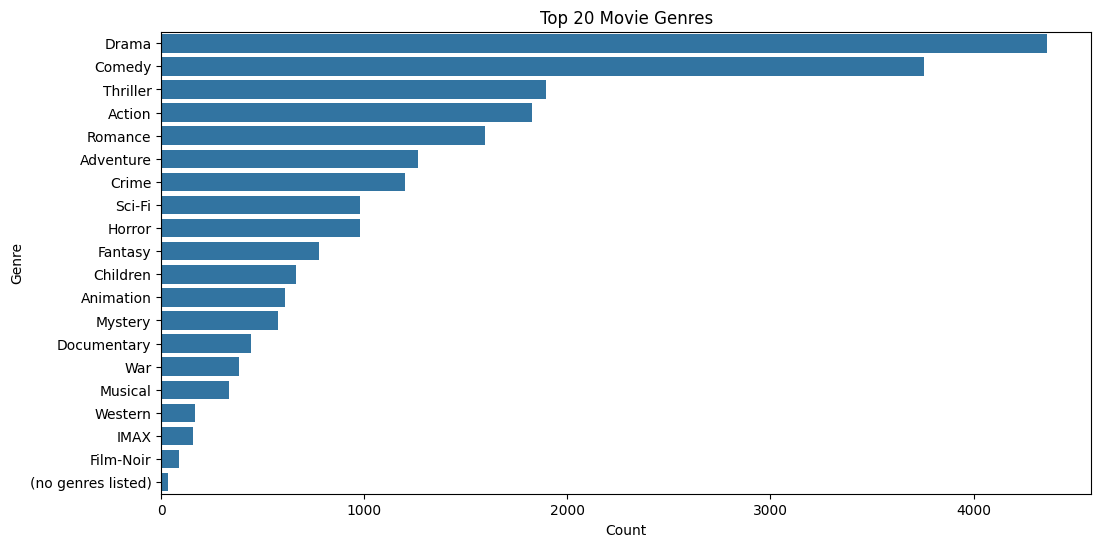

In [57]:
movies['genres'] = movies['genres'].str.split('|')
top_genres = []
for genres in movies['genres']:
    for genre in genres:
        top_genres.append(genre)

from collections import Counter
top_genres = Counter(top_genres).most_common(20)
top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=top_genres_df)
plt.title('Top 20 Movie Genres')
plt.show()


In [39]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [40]:
ratings.shape

(100836, 4)

In [58]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


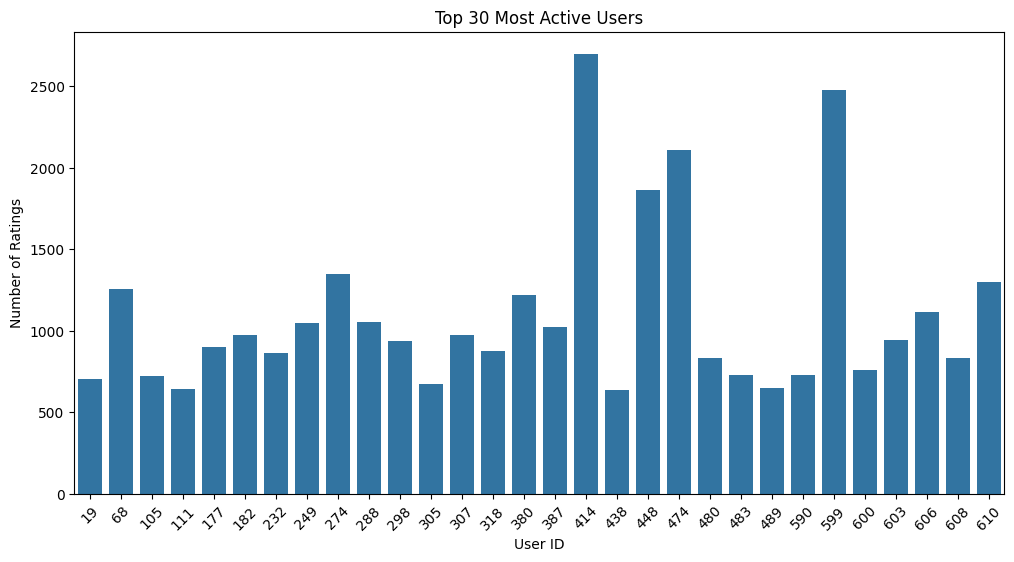

In [64]:
active_users = ratings.groupby('userId')['rating'].count().sort_values(ascending=False)[:30]
plt.figure(figsize=(12, 6))
sns.barplot(x=active_users.index, y=active_users.values)
plt.title('Top 30 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


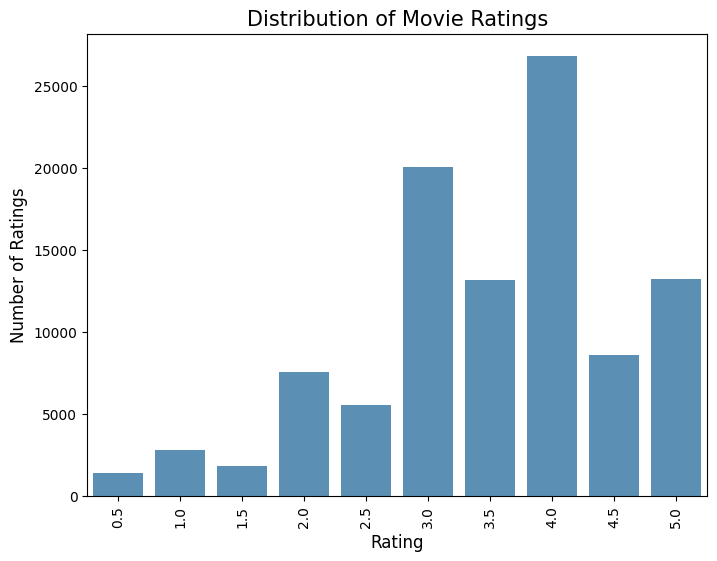

In [60]:
ratings_count = ratings['rating'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=ratings_count.index, y=ratings_count.values, alpha=0.8)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.title('Distribution of Movie Ratings', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [41]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [42]:
tags.shape

(3683, 4)

In [54]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


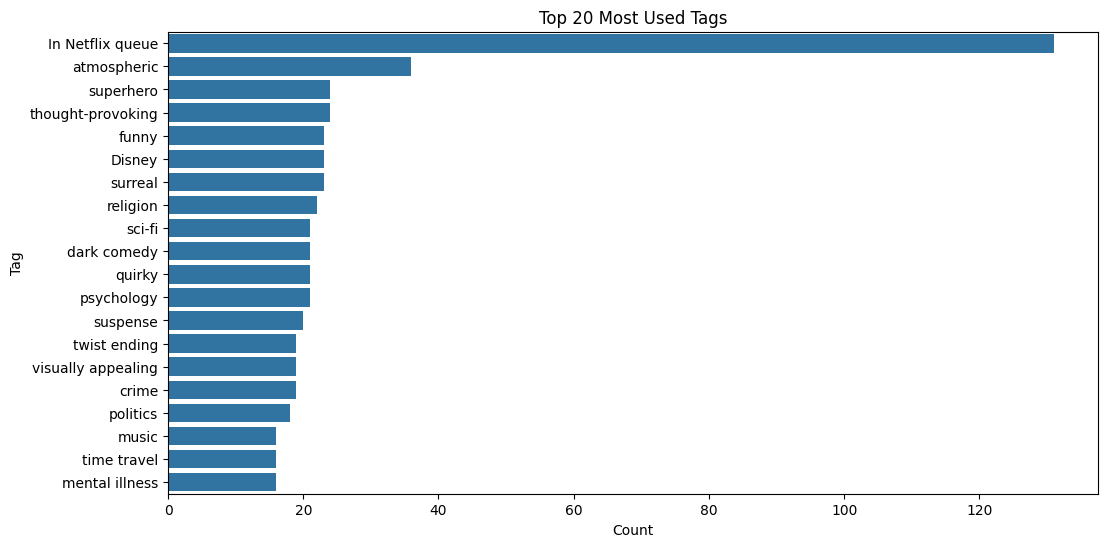

In [65]:
top_tags = Counter(tags['tag']).most_common(20)
top_tags_df = pd.DataFrame(top_tags, columns=['Tag', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Tag', data=top_tags_df)
plt.title('Top 20 Most Used Tags')
plt.show()


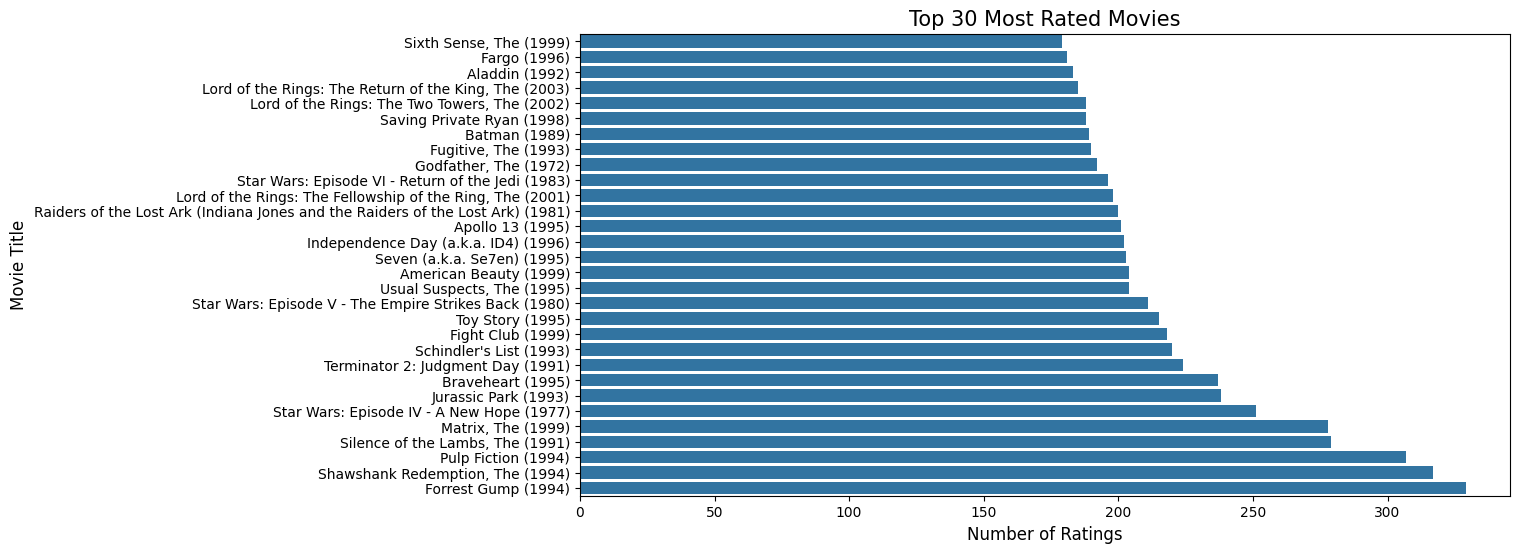

In [112]:
merged_data = pd.merge(movies, ratings, on='movieId')
top_30_movies = merged_data.groupby('title')['rating'].count().sort_values(ascending=False)[:30]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_movies.values, y=top_30_movies.index)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 30 Most Rated Movies', fontsize=15)
plt.gca().invert_yaxis()
plt.show()


In [117]:
merged_data = merged_data.head(100)
merged_data['genres'] = merged_data['genres'].apply(lambda x: ','.join(x))
merged_data['genres'] = merged_data['genres'].astype('category')

In [118]:
merged_data = merged_data.explode('genres')
merged_data['genres'] = merged_data['genres'].astype('category')